In [58]:
#tecotherm viewer by Igor Kiss (c) 2024

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime, timedelta

In [60]:
def read_data(file):
    data = pd.read_csv(file, encoding='utf-8', parse_dates=True, skiprows=1)

    return data

In [61]:
data = read_data('/Volumes/NO NAME/log/20231219_023614.csv')

In [62]:
data.columns

Index(['date (UTC)', ' time (UTC)', ' date (local)', ' time (local)', ' mode',
       ' desired precool temperature', ' desired rectal cooling temperature',
       ' desired duration of cooling phase',
       ' desired rectal warming temperature',
       ' desired duration of re-warming phase',
       ' commanded (trajectory) temperature', ' measured rectal temperature',
       ' measured skin temperature', ' measured mattress temperature',
       ' system alarm', ' flow alarm', ' level alarm', ' temperature alarm',
       ' audio off'],
      dtype='object')

In [63]:
data.shape

(5184, 19)

In [64]:
data.head()

,date (UTC),time (UTC),date (local),time (local),mode,desired precool temperature,desired rectal cooling temperature,desired duration of cooling phase,desired rectal warming temperature,desired duration of re-warming phase,commanded (trajectory) temperature,measured rectal temperature,measured skin temperature,measured mattress temperature,system alarm,flow alarm,level alarm,temperature alarm,audio off
0,19.12.2023,02:37:00,19.12.2023,02:37:00,automatic,20.0,33.5,72,36.4,15,33.5,35.3,0.6,25.5,0,1,1,0,0
1,19.12.2023,02:38:00,19.12.2023,02:38:00,automatic,20.0,33.5,72,36.4,15,33.5,34.8,0.6,25.6,0,1,1,0,0
2,19.12.2023,02:39:00,19.12.2023,02:39:00,automatic,20.0,33.5,72,36.4,15,33.5,34.6,0.6,25.9,0,1,1,0,1
3,19.12.2023,02:40:00,19.12.2023,02:40:00,automatic,20.0,33.5,72,36.4,15,33.5,34.6,0.6,26.0,0,1,1,0,1
4,19.12.2023,02:41:00,19.12.2023,02:41:00,automatic,20.0,33.5,72,36.4,15,33.5,34.4,0.6,25.5,0,0,0,0,0


In [65]:
data.describe()

,desired precool temperature,desired rectal cooling temperature,desired duration of cooling phase,desired rectal warming temperature,desired duration of re-warming phase,commanded (trajectory) temperature,measured rectal temperature,measured skin temperature,measured mattress temperature,system alarm,flow alarm,level alarm,temperature alarm,audio off
count,5184.0,5184.0,5184.0,5184.0,5184.0,5184.000000,5184.000000,5184.0,5184.000000,5184.0,5184.000000,5184.000000,5184.000000,5184.000000
mean,20.0,33.5,72.0,36.4,15.0,33.710976,33.671817,0.6,35.648264,0.0,0.000772,0.002508,0.001543,0.000386
std,0.0,0.0,0.0,0.0,0.0,0.573750,1.182569,0.0,1.893787,0.0,0.027770,0.050019,0.039257,0.019640
min,20.0,33.5,72.0,36.4,15.0,33.500000,0.300000,0.6,20.400000,0.0,0.000000,0.000000,0.000000,0.000000
25%,20.0,33.5,72.0,36.4,15.0,33.500000,33.500000,0.6,34.600000,0.0,0.000000,0.000000,0.000000,0.000000
50%,20.0,33.5,72.0,36.4,15.0,33.500000,33.500000,0.6,35.600000,0.0,0.000000,0.000000,0.000000,0.000000
75%,20.0,33.5,72.0,36.4,15.0,33.500000,33.600000,0.6,36.500000,0.0,0.000000,0.000000,0.000000,0.000000
max,20.0,33.5,72.0,36.4,15.0,36.200000,36.400000,0.6,39.100000,0.0,1.000000,1.000000,1.000000,1.000000


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date (UTC)                             5184 non-null   object 
 1    time (UTC)                            5184 non-null   object 
 2    date (local)                          5184 non-null   object 
 3    time (local)                          5184 non-null   object 
 4    mode                                  5184 non-null   object 
 5    desired precool temperature           5184 non-null   float64
 6    desired rectal cooling temperature    5184 non-null   float64
 7    desired duration of cooling phase     5184 non-null   int64  
 8    desired rectal warming temperature    5184 non-null   float64
 9    desired duration of re-warming phase  5184 non-null   int64  
 10   commanded (trajectory) temperature    5184 non-null   float64
 11   mea

In [67]:
data.columns = data.columns.str.strip()

In [68]:
# Remove leading and trailing spaces from the date and time strings
data['date (UTC)'] = data['date (UTC)'].str.strip()
data['time (UTC)'] = data['time (UTC)'].str.strip()
data['date (local)'] = data['date (local)'].str.strip()
data['time (local)'] = data['time (local)'].str.strip()

# Concatenate the date and time strings and convert them to datetime objects
data['datetime (UTC)'] = pd.to_datetime(data['date (UTC)'] + ' ' + data['time (UTC)'], dayfirst=True)
data['datetime (local)'] = pd.to_datetime(data['date (local)'] + ' ' + data['time (local)'], dayfirst=True)


In [76]:
start_date = data['datetime (local)'].min()
end_date = data['datetime (local)'].max()
total_duration = end_date - start_date

# Extract days
days = total_duration.days
# Convert remaining seconds to hours, minutes, and seconds
seconds = total_duration.seconds
hours = seconds // 3600
minutes = (seconds % 3600) // 60
seconds = (seconds % 60)

# Format the total therapy time as "X days, Y hours, Z minutes, W seconds"
total_therapy_time = f"{days} dní, {hours} hodín, {minutes} minút"

print("Total Therapy Time:", total_therapy_time)


Total Therapy Time: 3 dní, 14 hodín, 23 minút


In [70]:
flow_alarm = data[data['flow alarm'] == 1]['datetime (local)']
system_alarm = data[data['system alarm'] == 1]['datetime (local)']
level_alarm = data[data['level alarm'] == 1]['datetime (local)']
temperature_alarm = data[data['temperature alarm'] == 1]['datetime (local)']
alarm_off = data[data['audio off'] == 1]['datetime (local)']

In [71]:
def vertical_alarm_line(alarm_data, color, text):
    for alarm in alarm_data:
        plt.axvline(alarm, color=color, linestyle='--')
        y_center = np.mean(plt.ylim())
        plt.text(alarm, y_center, text, rotation=0, color=color, fontsize=12)

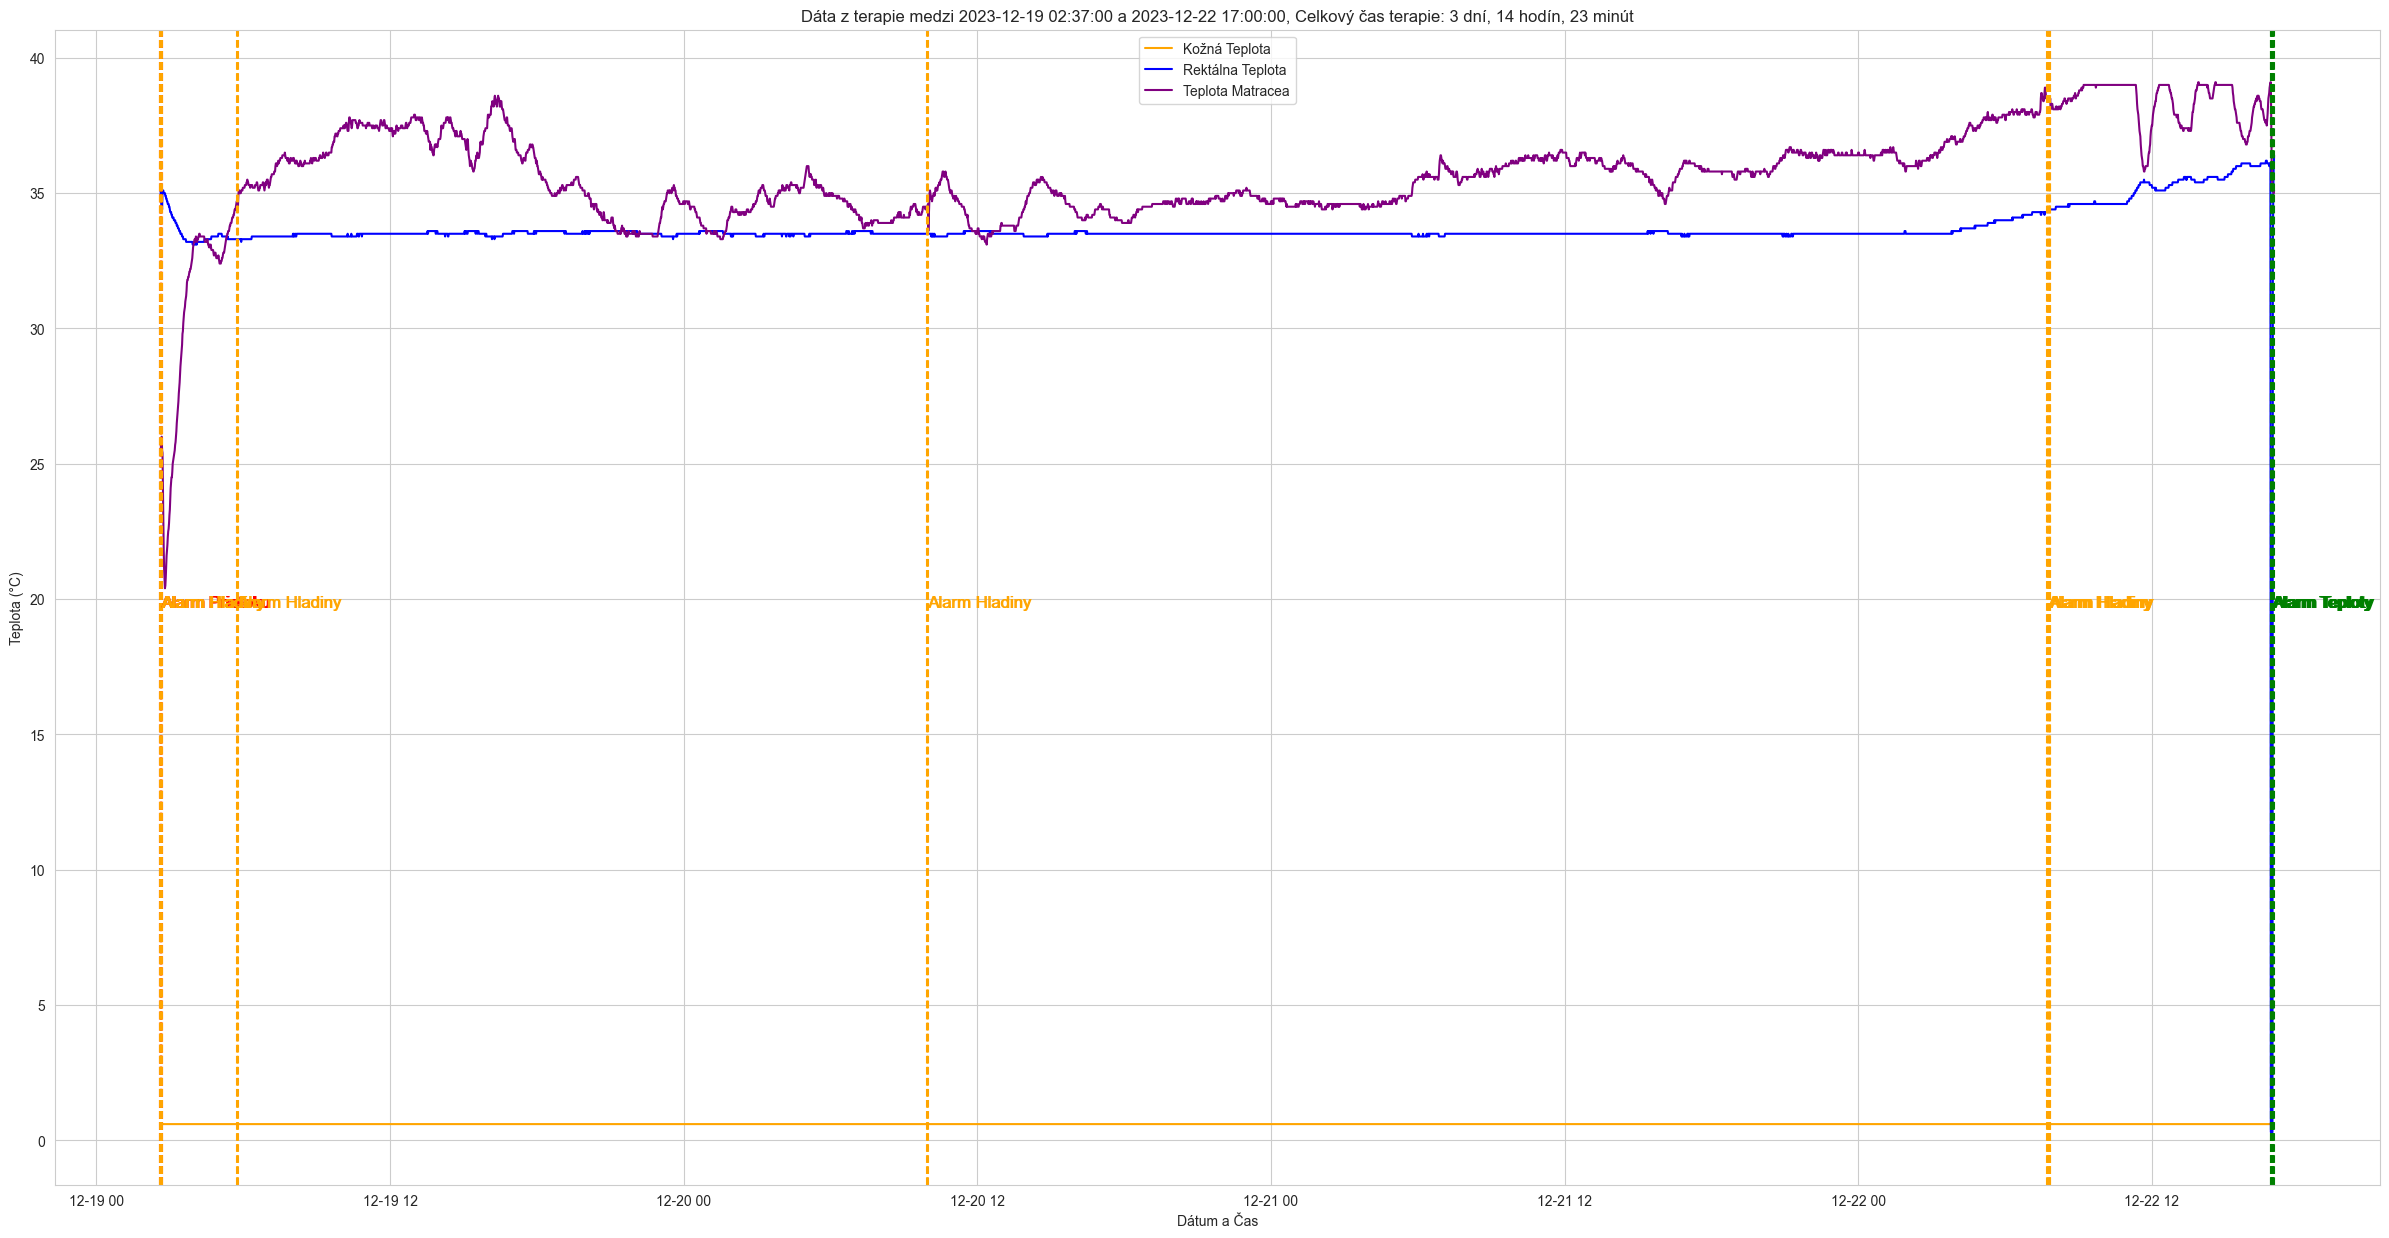

In [77]:
sns.set_style('whitegrid')
plt.figure(figsize=(30, 15)) 
sns.lineplot(x='datetime (local)', y='measured skin temperature', data=data, color='orange', label='Kožná Teplota')
sns.lineplot(x='datetime (local)', y='measured rectal temperature', data=data, color='blue', label='Rektálna Teplota')
sns.lineplot(x='datetime (local)', y='measured mattress temperature', data=data, color='purple', label='Teplota Matracea')
vertical_alarm_line(temperature_alarm, 'green', 'Alarm Teploty')
vertical_alarm_line(flow_alarm, 'red', 'Alarm Prietoku')
vertical_alarm_line(system_alarm, 'purple', 'Systémová Chyba')
vertical_alarm_line(level_alarm, 'orange', 'Alarm Hladiny')
#vertical_alarm_line(alarm_off, 'orange', 'Level Alarm')
plt.ylabel('Teplota (°C)')
plt.xlabel('Dátum a Čas')
plt.title(f'Dáta z terapie medzi {start_date} a {end_date}, Celkový čas terapie: {total_therapy_time}')
# add a legend for the vertical lines
plt.legend()

plt.show()